## Basic pyerrors example

Import numpy, matplotlib and pyerrors.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
usetex = matplotlib.checkdep_usetex(True)
plt.rc('text', usetex=usetex)

We use numpy to generate some fake data

In [3]:
test_sample1 = np.random.normal(2.0, 0.5, 1000)
test_sample2 = np.random.normal(1.0, 0.1, 1000)

From this we can construct `Obs`, which are the basic object of `pyerrors`. For each sample we give to the obs, we also have to specify an ensemble/replica name. In this example we assume that both datasets originate from the same gauge field ensemble labeled 'ensemble1'.

In [4]:
obs1 = pe.Obs([test_sample1], ['ensemble1'])
obs2 = pe.Obs([test_sample2], ['ensemble1'])

We can now combine these two observables into a third one:

In [5]:
obs3 = np.log(obs1 ** 2 / obs2 ** 4)

`pyerrors` overloads all basic math operations, the user can work with these `Obs` as if they were real numbers. The proper error propagation is performed in the background via automatic differentiation.

If we are now interested in the error of `obs3`, we can use the `gamma_method` to compute it and then print the object to the notebook

In [6]:
obs3.gamma_method()
print(obs3)

1.367(20)


With the method `details` we can take a look at the integrated autocorrelation time estimated by the automatic windowing procedure as well as the detailed content of the `Obs` object.

In [7]:
obs3.details()

Result	 1.36706932e+00 +/- 2.04253682e-02 +/- 1.02126841e-03 (1.494%)
 t_int	 5.01998002e-01 +/- 4.47213595e-02 S = 2.00
1000 samples in 1 ensemble:
  · Ensemble 'ensemble1' : 1000 configurations (from 1 to 1000)


As expected the random data from numpy exhibits no autocorrelation ($\tau_\text{int}\,\approx0.5$). It can still be interesting to have a look at the window size dependence of the integrated autocorrelation time

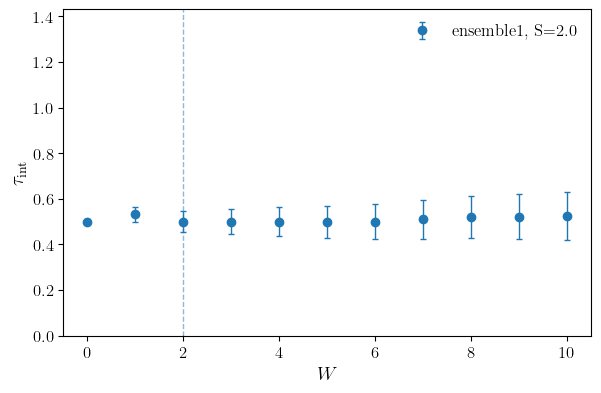

In [8]:
obs3.plot_tauint()

This figure shows the windowsize dependence of the integrated autocorrelation time. The vertical line signalizes the window chosen by the automatic windowing procedure with $S=2.0$.
Choosing a larger windowsize would not significantly alter $\tau_\text{int}$, so everything seems to be correct here.

## Correlated data

We can now generate fake data with a given covariance matrix and integrated autocorrelation times:

In [9]:
cov = np.array([[0.5, -0.2], [-0.2, 0.3]])  # Covariance matrix
tau = [4, 8]  # Autocorrelation times
c_obs1, c_obs2 = pe.misc.gen_correlated_data([2.8, 2.1], cov, 'ens1', tau)

and once again combine the two `Obs` to a new one with arbitrary math operations

In [10]:
c_obs3 = np.sin(c_obs1 / c_obs2 - 1)
c_obs3.gamma_method()
c_obs3.details()

Result	 3.27194697e-01 +/- 1.53249111e+00 +/- 2.49471479e-01 (468.373%)
 t_int	 4.75187177e+00 +/- 1.33949719e+00 S = 2.00
1000 samples in 1 ensemble:
  · Ensemble 'ens1' : 1000 configurations (from 1 to 1000)


This time we see a significant autocorrelation so it is worth to have a closer look at the normalized autocorrelation function (rho) and the integrated autocorrelation time

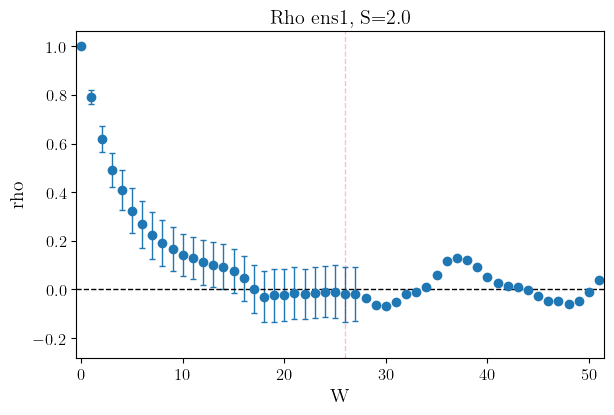

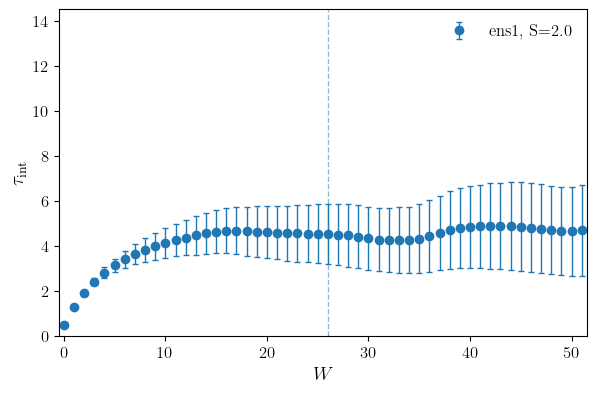

In [11]:
c_obs3.plot_rho()
c_obs3.plot_tauint()

We can now redo the error analysis and alter the value of S or attach a tail to the autocorrelation function via the parameter `tau_exp` to take into account long range autocorrelations

Result	 3.27194697e-01 +/- 1.67779862e+00 +/- 2.08884244e-01 (512.783%)
 t_int	 5.69571763e+00 +/- 2.09295390e+00 tau_exp = 20.00,  N_sigma = 1
1000 samples in 1 ensemble:
  · Ensemble 'ens1' : 1000 configurations (from 1 to 1000)


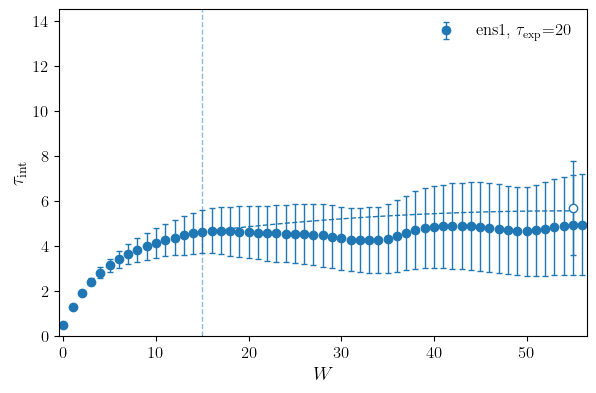

In [12]:
c_obs3.gamma_method(tau_exp=20)
c_obs3.details()
c_obs3.plot_tauint()